#PROBLEM STATEMENT
##A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/HRJANHACK/train_jqd04QH.csv')
df_test= pd.read_csv('/content/drive/My Drive/HRJANHACK/test_KaymcHn.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [4]:
df.isna().sum()


enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


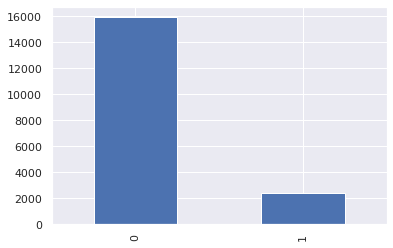

In [6]:
df['target'].value_counts().plot(kind='bar');

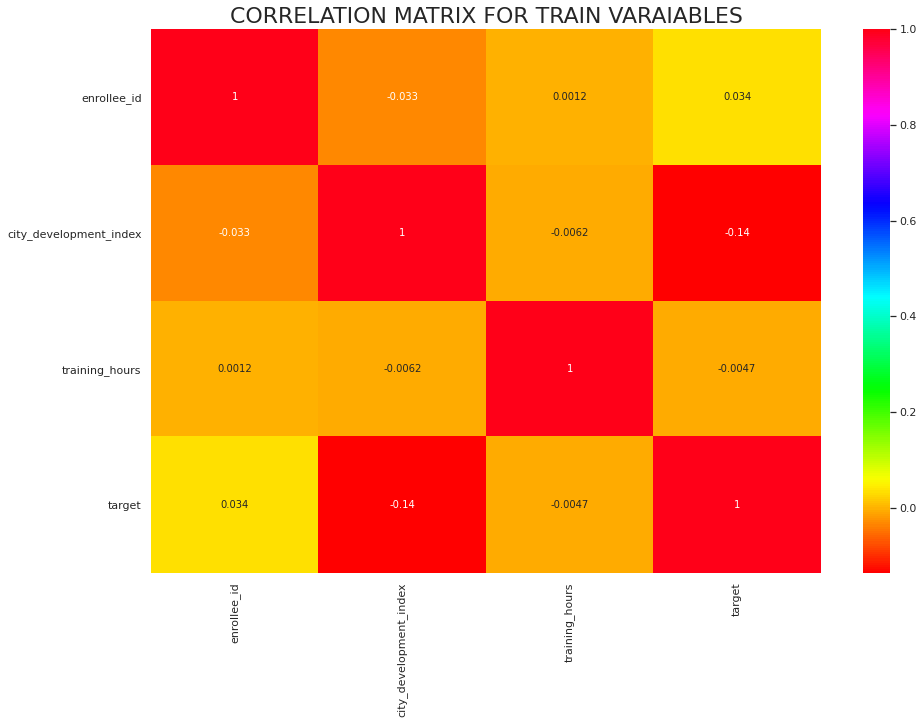

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv')
plt.title("CORRELATION MATRIX FOR TRAIN VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((15, 10))
plt.show()

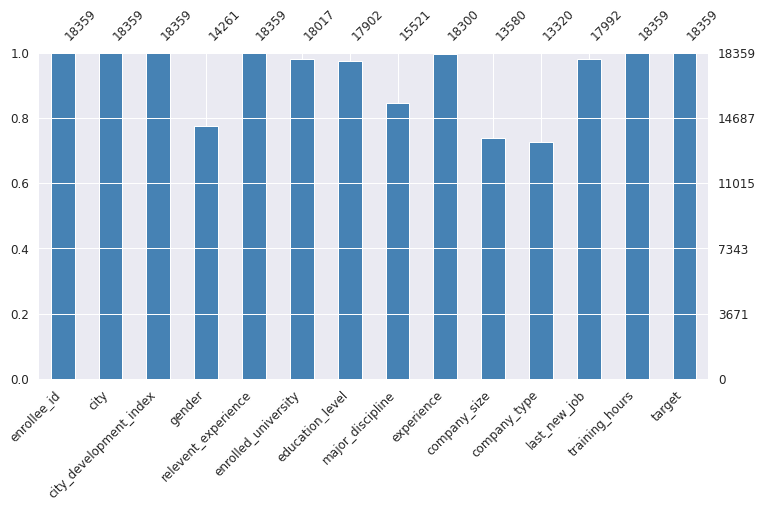

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

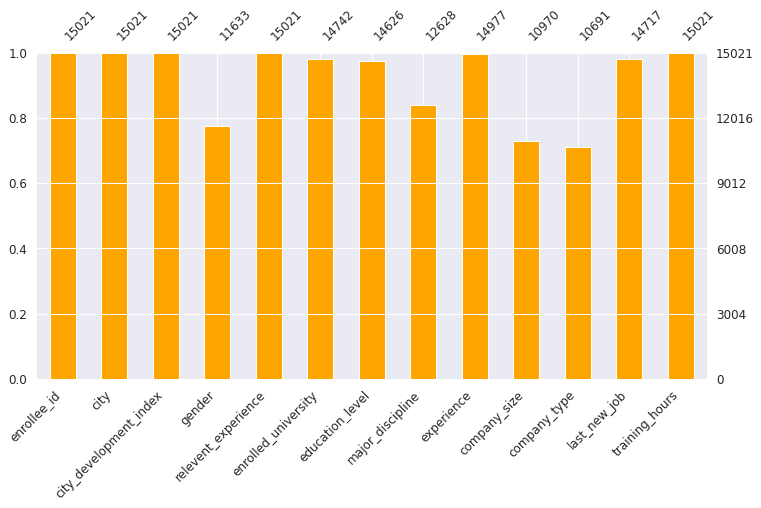

In [75]:
msno.bar(df_test, figsize=(12, 6), fontsize=12, color='orange')

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
#instantiate both packages to use

#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
# create a list of categorical columns to iterate over
cat_cols = ['experience','last_new_job','enrolled_university','education_level']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df[columns])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [10]:
df.head(30)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,2,0,STEM,13,100-500,Pvt Ltd,0,106,0
1,29166,city_83,0.923,Male,Has relevent experience,2,0,STEM,5,<10,Funded Startup,0,69,0
2,46,city_16,0.910,NaN,Has relevent experience,2,0,STEM,16,50-99,Public Sector,1,4,0
3,18527,city_64,0.666,Male,Has relevent experience,2,0,STEM,5,50-99,Pvt Ltd,0,26,0
4,21751,city_100,0.887,NaN,No relevent experience,2,2,STEM,18,NaN,NaN,1,88,1
5,13342,city_21,0.624,Female,Has relevent experience,2,0,Other,18,5000-9999,Pvt Ltd,1,34,0
6,11746,city_21,0.624,Male,Has relevent experience,2,0,STEM,16,10000+,Pvt Ltd,2,23,1
7,24127,city_114,0.926,Male,Has relevent experience,2,2,STEM,21,<10,Pvt Ltd,4,8,0
8,7615,city_103,0.920,Male,Has relevent experience,2,0,STEM,21,1000-4999,Pvt Ltd,4,10,0
9,9676,city_97,0.925,Male,Has relevent experience,2,0,STEM,21,1000-4999,Pvt Ltd,4,85,0


In [76]:
for columns in cat_cols:
    encode(df_test[columns])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

In [11]:

# impute data and convert 
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df[['experience','last_new_job','enrolled_university','education_level']])),columns = cat_cols)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [12]:
encode_data.isna().sum()

experience             0
last_new_job           0
enrolled_university    0
education_level        0
dtype: int64

In [77]:
encode_data_test = pd.DataFrame(np.round(imputer.fit_transform(df_test[['experience','last_new_job','enrolled_university','education_level']])),columns = cat_cols)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [13]:
encode_data.head(30)

,experience,last_new_job,enrolled_university,education_level
0,13.0,0.0,2.0,0.0
1,5.0,0.0,2.0,0.0
2,16.0,1.0,2.0,0.0
3,5.0,0.0,2.0,0.0
4,18.0,1.0,2.0,2.0
5,18.0,1.0,2.0,0.0
6,16.0,2.0,2.0,0.0
7,21.0,4.0,2.0,2.0
8,21.0,4.0,2.0,0.0
9,21.0,4.0,2.0,0.0


In [0]:
df.drop(['gender','major_discipline','company_size','company_type'],axis=1,inplace=True)

In [0]:
df_test.drop(['gender','major_discipline','company_size','company_type'],axis=1,inplace=True)

In [15]:
df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,23798,city_149,0.689,Has relevent experience,2,0,13,0,106,0
1,29166,city_83,0.923,Has relevent experience,2,0,5,0,69,0
2,46,city_16,0.910,Has relevent experience,2,0,16,1,4,0
3,18527,city_64,0.666,Has relevent experience,2,0,5,0,26,0
4,21751,city_100,0.887,No relevent experience,2,2,18,1,88,1
...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Has relevent experience,0,0,15,0,71,0
18355,25545,city_160,0.920,No relevent experience,2,0,6,0,160,0
18356,11514,city_114,0.926,Has relevent experience,2,2,2,2,18,0
18357,1689,city_75,0.939,Has relevent experience,2,0,21,2,41,0


In [0]:
mod_df= df.join(encode_data, rsuffix='_mod')

In [0]:
mod_df_test= df_test.join(encode_data_test, rsuffix='_mod_test')

In [17]:
mod_df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,experience_mod,last_new_job_mod,enrolled_university_mod,education_level_mod
0,23798,city_149,0.689,Has relevent experience,2,0,13,0,106,0,13.0,0.0,2.0,0.0
1,29166,city_83,0.923,Has relevent experience,2,0,5,0,69,0,5.0,0.0,2.0,0.0
2,46,city_16,0.910,Has relevent experience,2,0,16,1,4,0,16.0,1.0,2.0,0.0
3,18527,city_64,0.666,Has relevent experience,2,0,5,0,26,0,5.0,0.0,2.0,0.0
4,21751,city_100,0.887,No relevent experience,2,2,18,1,88,1,18.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Has relevent experience,0,0,15,0,71,0,15.0,0.0,0.0,0.0
18355,25545,city_160,0.920,No relevent experience,2,0,6,0,160,0,6.0,0.0,2.0,0.0
18356,11514,city_114,0.926,Has relevent experience,2,2,2,2,18,0,2.0,2.0,2.0,2.0
18357,1689,city_75,0.939,Has relevent experience,2,0,21,2,41,0,21.0,2.0,2.0,0.0


In [0]:
cat_cols = ['experience','last_new_job','enrolled_university','education_level']
mod_df.drop(cat_cols,axis=1,inplace=True)

In [0]:
cat_cols = ['experience','last_new_job','enrolled_university','education_level']
mod_df_test.drop(cat_cols,axis=1,inplace=True)


In [19]:
mod_df

,enrollee_id,city,city_development_index,relevent_experience,training_hours,target,experience_mod,last_new_job_mod,enrolled_university_mod,education_level_mod
0,23798,city_149,0.689,Has relevent experience,106,0,13.0,0.0,2.0,0.0
1,29166,city_83,0.923,Has relevent experience,69,0,5.0,0.0,2.0,0.0
2,46,city_16,0.910,Has relevent experience,4,0,16.0,1.0,2.0,0.0
3,18527,city_64,0.666,Has relevent experience,26,0,5.0,0.0,2.0,0.0
4,21751,city_100,0.887,No relevent experience,88,1,18.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Has relevent experience,71,0,15.0,0.0,0.0,0.0
18355,25545,city_160,0.920,No relevent experience,160,0,6.0,0.0,2.0,0.0
18356,11514,city_114,0.926,Has relevent experience,18,0,2.0,2.0,2.0,2.0
18357,1689,city_75,0.939,Has relevent experience,41,0,21.0,2.0,2.0,0.0


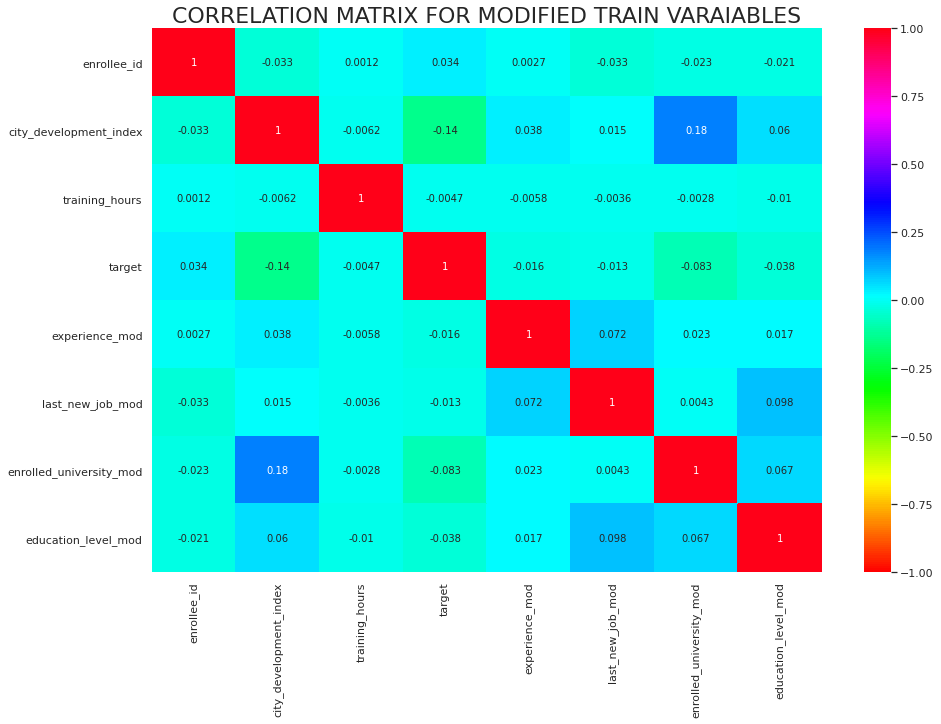

In [20]:
corr = mod_df.corr()
sns.heatmap(corr, annot=True, vmax=1,vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv')
plt.title("CORRELATION MATRIX FOR MODIFIED TRAIN VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((15, 10))
plt.show()

In [21]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   enrollee_id              18359 non-null  int64  
 1   city                     18359 non-null  object 
 2   city_development_index   18359 non-null  float64
 3   relevent_experience      18359 non-null  object 
 4   training_hours           18359 non-null  int64  
 5   target                   18359 non-null  int64  
 6   experience_mod           18359 non-null  float64
 7   last_new_job_mod         18359 non-null  float64
 8   enrolled_university_mod  18359 non-null  float64
 9   education_level_mod      18359 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.4+ MB


In [0]:
mod_df['target']= mod_df['target'].astype(object)
mod_df['last_new_job_mod']= mod_df['last_new_job_mod'].astype(object)
mod_df['enrolled_university_mod'] = mod_df['enrolled_university_mod'].astype(object)
mod_df['education_level_mod']= mod_df['education_level_mod'].astype(object)
mod_df['experience_mod']= mod_df['experience_mod'].astype(object)

In [0]:
#mod_df_test['target']= mod_df_test['target'].astype(object)
mod_df_test['last_new_job_mod_test']= mod_df_test['last_new_job_mod_test'].astype(object)
mod_df_test['enrolled_university_mod_test'] = mod_df_test['enrolled_university_mod_test'].astype(object)
mod_df_test['education_level_mod_test']= mod_df_test['education_level_mod_test'].astype(object)
mod_df_test['experience_mod_test']= mod_df_test['experience_mod_test'].astype(object)

In [0]:
train_df= mod_df.copy()

In [0]:
test_df= mod_df_test.copy()

In [24]:
train_df .head(1)

,enrollee_id,city,city_development_index,relevent_experience,training_hours,target,experience_mod,last_new_job_mod,enrolled_university_mod,education_level_mod
0,23798,city_149,0.689,Has relevent experience,106,0,13,0,2,0


In [72]:
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [0]:
conditions  = [train_df.experience_mod > 20, train_df.experience_mod > 18,train_df.experience_mod > 15,train_df.experience_mod > 12,train_df.experience_mod > 8,
               train_df.experience_mod > 5,train_df.experience_mod > 3,train_df.experience_mod > 1,train_df.experience_mod < 1,train_df.experience_mod>0]
choices     = [ "superannuated", 'long_eng', 'pensionable','sarged','copped','graduated','laced','roied','abinitio','nil_exp']

train_df["seg_exp"] = np.select(conditions, choices)

In [0]:
conditions  = [test_df.experience_mod_test > 20, test_df.experience_mod_test > 18,test_df.experience_mod_test > 15,test_df.experience_mod_test > 12,test_df.experience_mod_test > 8,
               test_df.experience_mod_test > 5,test_df.experience_mod_test> 3,test_df.experience_mod_test > 1,test_df.experience_mod_test < 1,test_df.experience_mod_test>0]
choices     = [ "superannuated", 'long_eng', 'pensionable','sarged','copped','graduated','laced','roied','abinitio','nil_exp']


test_df["seg_exp"] = np.select(conditions, choices)

In [26]:
train_df["seg_exp"].unique()

array(['sarged', 'laced', 'pensionable', 'superannuated', 'long_eng',
       'graduated', 'nil_exp', 'abinitio', 'roied', 'copped'],
      dtype=object)

In [86]:
test_df["seg_exp"].unique()

array(['long_eng', 'superannuated', 'sarged', 'pensionable', 'copped',
       'nil_exp', 'laced', 'graduated', 'roied', 'abinitio'], dtype=object)

In [0]:
mod_df_dummies=[pd.get_dummies(train_df['relevent_experience'],prefix='relevent_experience',prefix_sep=':'),
pd.get_dummies(train_df['last_new_job_mod'],prefix='last_new_job_mod',prefix_sep=':'),
pd.get_dummies(train_df['seg_exp'],prefix='seg_exp',prefix_sep=':'),
pd.get_dummies(train_df['enrolled_university_mod'],prefix='enrolled_university_mod',prefix_sep=':'),
pd.get_dummies(train_df['education_level_mod'],prefix='education_level_mod',prefix_sep=':')]

In [91]:
test_df.head(1)

,enrollee_id,city,city_development_index,relevent_experience,training_hours,experience_mod_test,last_new_job_mod_test,enrolled_university_mod_test,education_level_mod_test,seg_exp
0,16548,city_33,0.448,No relevent experience,15,20,2,0,0,long_eng


In [0]:
mod_df_dummies_test=[pd.get_dummies(test_df['relevent_experience'],prefix='relevent_experience',prefix_sep=':'),
pd.get_dummies(test_df['last_new_job_mod_test'],prefix='last_new_job_mod_test',prefix_sep=':'),
pd.get_dummies(test_df['seg_exp'],prefix='seg_exp',prefix_sep=':'),
pd.get_dummies(test_df['enrolled_university_mod_test'],prefix='enrolled_university_mod_test',prefix_sep=':'),
pd.get_dummies(test_df['education_level_mod_test'],prefix='education_level_mod_test',prefix_sep=':')]

In [0]:
mod_df_dummies= pd.concat(mod_df_dummies,axis=1)

In [0]:
mod_df_dummies_test= pd.concat(mod_df_dummies_test,axis=1)

In [0]:
train_df=pd.concat([train_df,mod_df_dummies],axis=1)

In [0]:
test_df=pd.concat([test_df,mod_df_dummies_test],axis=1)

In [0]:
ref_cat= train_df[['city','relevent_experience','experience_mod','last_new_job_mod','enrolled_university_mod','education_level_mod','seg_exp']]

In [97]:
test_df.head(1)

,enrollee_id,city,city_development_index,relevent_experience,training_hours,experience_mod_test,last_new_job_mod_test,enrolled_university_mod_test,education_level_mod_test,seg_exp,relevent_experience:Has relevent experience,relevent_experience:No relevent experience,last_new_job_mod_test:0.0,last_new_job_mod_test:1.0,last_new_job_mod_test:2.0,last_new_job_mod_test:3.0,last_new_job_mod_test:4.0,last_new_job_mod_test:5.0,seg_exp:abinitio,seg_exp:copped,seg_exp:graduated,seg_exp:laced,seg_exp:long_eng,seg_exp:nil_exp,seg_exp:pensionable,seg_exp:roied,seg_exp:sarged,seg_exp:superannuated,enrolled_university_mod_test:0.0,enrolled_university_mod_test:1.0,enrolled_university_mod_test:2.0,education_level_mod_test:0.0,education_level_mod_test:1.0,education_level_mod_test:2.0,education_level_mod_test:3.0,education_level_mod_test:4.0
0,16548,city_33,0.448,No relevent experience,15,20,2,0,0,long_eng,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [0]:
ref_cat_test= test_df[['city','relevent_experience','experience_mod_test','last_new_job_mod_test','enrolled_university_mod_test','education_level_mod_test','seg_exp']]

In [0]:
train_df.drop(ref_cat,axis=1,inplace=True)

In [0]:
test_df.drop(ref_cat_test,axis=1,inplace=True)

In [32]:
mod_df.head(1)

,enrollee_id,city,city_development_index,relevent_experience,training_hours,target,experience_mod,last_new_job_mod,enrolled_university_mod,education_level_mod
0,23798,city_149,0.689,Has relevent experience,106,0,13,0,2,0


In [0]:
train_y = train_df["target"].values
train_X = train_df.drop(["target"], axis=1)

In [0]:
to_test= test_df

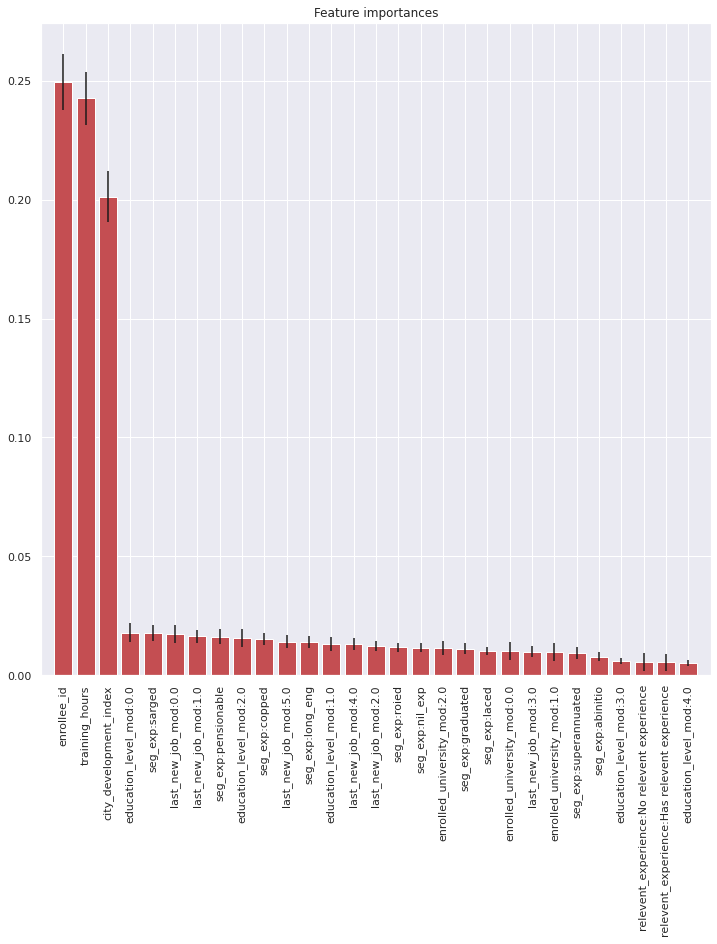

In [35]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)

## plot the importances ##
feat_names = train_X.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:50]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

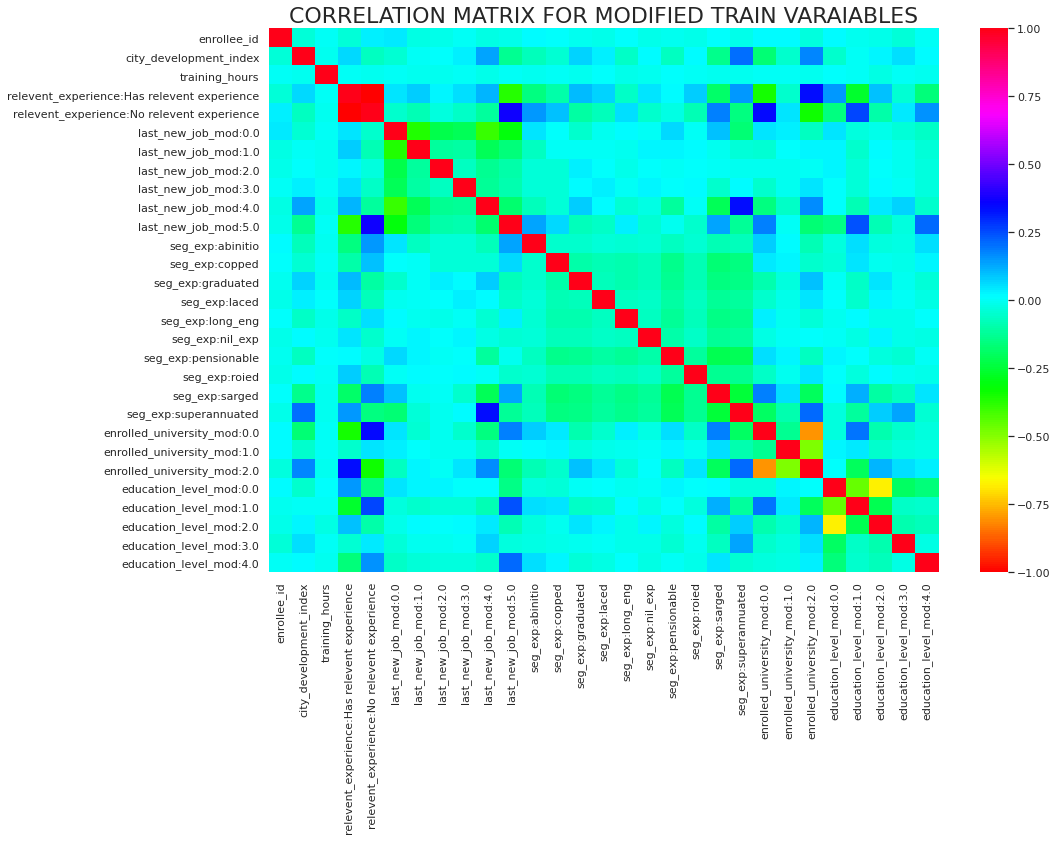

In [37]:
  corr = train_df.corr()
sns.heatmap(corr,  vmax=1,vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='hsv')
plt.title("CORRELATION MATRIX FOR MODIFIED TRAIN VARAIABLES",fontdict={'fontsize': 22, 'fontweight': 'medium'})
plt.gcf().set_size_inches((15, 10))
plt.show()

In [0]:
y= train_df["target"].astype(int) 
X= train_df.drop(["target"], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
y_train

16020    0
5431     0
1571     0
14374    0
12912    0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: target, Length: 14687, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.75


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.86


In [0]:

import lightgbm as lgb

train_data = lgb.Dataset(X, label = y)

#setting parameters for lightgbm
param = {'num_leaves':30, 'objective':'binary','max_depth':8,'learning_rate':.11, 'max_bin' : 200}
param['metric'] = ['auc', 'accuracy']

lgbmodel = lgb.train(param, train_data, 15000, verbose_eval=True)

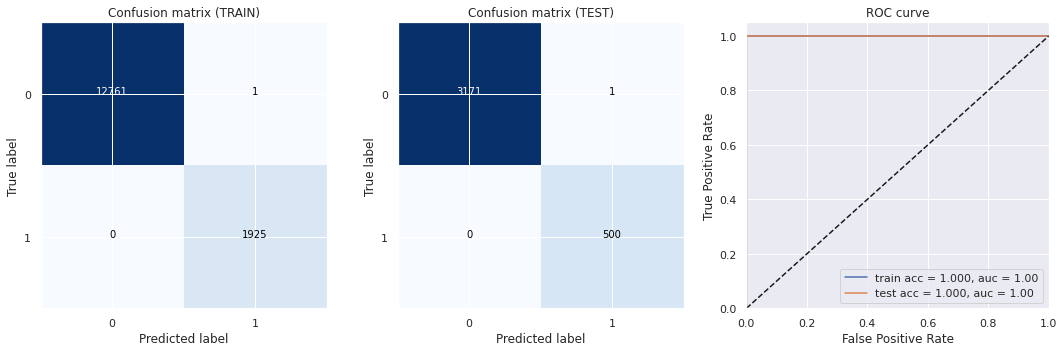

In [71]:
import numpy as np

from sklearn.metrics import roc_curve, auc
y_train_pred =lgbmodel.predict(X_train)
y_test_pred = lgbmodel.predict(X_test)

threshold = 0.4

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()




In [0]:
y_test_pred = lgbmodel.predict(to_test)

In [102]:
y_test_pred

array([1.88487034e-01, 1.97790634e-13, 5.43914343e-04, ...,
       3.46283357e-08, 8.79166326e-02, 1.76989928e-04])

In [105]:
train_df

,enrollee_id,city_development_index,training_hours,target,relevent_experience:Has relevent experience,relevent_experience:No relevent experience,last_new_job_mod:0.0,last_new_job_mod:1.0,last_new_job_mod:2.0,last_new_job_mod:3.0,last_new_job_mod:4.0,last_new_job_mod:5.0,seg_exp:abinitio,seg_exp:copped,seg_exp:graduated,seg_exp:laced,seg_exp:long_eng,seg_exp:nil_exp,seg_exp:pensionable,seg_exp:roied,seg_exp:sarged,seg_exp:superannuated,enrolled_university_mod:0.0,enrolled_university_mod:1.0,enrolled_university_mod:2.0,education_level_mod:0.0,education_level_mod:1.0,education_level_mod:2.0,education_level_mod:3.0,education_level_mod:4.0
0,23798,0.689,106,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,29166,0.923,69,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,46,0.910,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,18527,0.666,26,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,21751,0.887,88,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,0.920,71,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
18355,25545,0.920,160,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
18356,11514,0.926,18,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
18357,1689,0.939,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [0]:
test_df.set_index('enrollee_id',inplace=True)

In [0]:
y_test_pred= pd.DataFrame(y_test_pred,index=test_df.index).round().astype(int)

In [112]:
y_test_pred.head(40)

,0
enrollee_id,
16548,0
12036,0
11061,0
5032,0
17599,0
19314,0
12365,1
22696,0
16083,0


In [0]:
y_test_pred.to_csv('/content/drive/My Drive/HR/predictions_lgb.csv')